## TC 5033
### Word Embeddings

<br>

#### Activity 3a: Exploring Word Embeddings with GloVe and Numpy
<br>

- Objective:
    - To understand the concept of word embeddings and their significance in Natural Language Processing.
    - To learn how to manipulate and visualize high-dimensional data using dimensionality reduction techniques like PCA and t-SNE.
    - To gain hands-on experience in implementing word similarity and analogies using GloVe embeddings and Numpy.
    
<br>

- Instructions:
    - Download GloVe pre-trained vectors from the provided link in Canvas, the official public project:
    Jeffrey Pennington, Richard Socher, and Christopher D. Manning. 2014. GloVe: Global Vectors for Word Representation
    https://nlp.stanford.edu/data/glove.6B.zip

    - Create a dictorionay of the embeddings so that you carry out fast look ups. Save that dictionary e.g. as a serialized file for faster loading in future uses.
    
    - PCA and t-SNE Visualization: After loading the GloVe embeddings, use Numpy and Sklearn to perform PCA and t-SNE to reduce the dimensionality of the embeddings and visualize them in a 2D or 3D space.

    - Word Similarity: Implement a function that takes a word as input and returns the 'n' most similar words based on their embeddings. You should use Numpy to implement this function, using libraries that already implement this function (e.g. Gensim) will result in zero points.

    - Word Analogies: Implement a function to solve analogies between words. For example, "man is to king as woman is to ____". You should use Numpy to implement this function, using libraries that already implement this function (e.g. Gensim) will result in zero points.

    - Submission: This activity is to be submitted in teams of 3 or 4. Only one person should submit the final work, with the full names of all team members included in a markdown cell at the beginning of the notebook.
    
<br>

- Evaluation Criteria:

    - Code Quality (40%): Your code should be well-organized, clearly commented, and easy to follow. Use also markdown cells for clarity.
    
   - Functionality (60%): All functions should work as intended, without errors.
       - Visualization of PCA and t-SNE (10% each for a total of 20%)
       - Similarity function (20%)
       - Analogy function (20%)
|



### Team:

- Martín Jurado .................................................. A01795568
- Lineth Guerra .................................................. A01795639
- Erick Eduardo Betancourt ........................... A01795545
- Luis Alejandro González Castellanos ................. A01795481
- Jesús Armando Anaya Orozco .................... A01795464

#### Import libraries

In [1]:
# Import libraries
import torch
import torch.nn.functional as F
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np
from numpy.linalg import norm
import pickle
plt.style.use('ggplot')

#### Load file

In [2]:
PATH1 = './glove.6B.50d.txt'
PATH2 = './glove.6B.200d.txt'
emb_dim1 = 50
emb_dim2 = 200

In [3]:
# Create dictionary with embeddings
def create_emb_dictionary(path):
    emb_dict = {}
    with open(path, 'r') as f:
        for line in f:
            values = line.split()
            word = values[0]
            vector = np.asarray(values[1:], 'float32')
            emb_dict[word] = vector
    return emb_dict

In [4]:
# create dictionary for both files
embeddings_dict1 = create_emb_dictionary(PATH1)
embeddings_dict2 = create_emb_dictionary(PATH2)

In [5]:
# Serialize 50D
with open('embeddings_dict_50D.pkl', 'wb') as f:
    pickle.dump(embeddings_dict1, f)

# Deserialize
# with open('embeddings_dict_50D.pkl', 'rb') as f:
#     embeddings_dict = pickle.load(f)

In [6]:
# Serialize 200D
with open('embeddings_dict_200D.pkl', 'wb') as f:
    pickle.dump(embeddings_dict2, f)

# Deserialize
# with open('embeddings_dict_200D.pkl', 'rb') as f:
#     embeddings_dict = pickle.load(f)

#### See some embeddings

In [7]:
# Show some
def show_n_first_words(path, n_words):
        with open(path, 'r') as f:
            for i, line in enumerate(f):
                print(line.split(), len(line.split()[1:]))
                if i>=n_words: break

In [8]:
# 50d vector
show_n_first_words(PATH1, 5)

['the', '0.418', '0.24968', '-0.41242', '0.1217', '0.34527', '-0.044457', '-0.49688', '-0.17862', '-0.00066023', '-0.6566', '0.27843', '-0.14767', '-0.55677', '0.14658', '-0.0095095', '0.011658', '0.10204', '-0.12792', '-0.8443', '-0.12181', '-0.016801', '-0.33279', '-0.1552', '-0.23131', '-0.19181', '-1.8823', '-0.76746', '0.099051', '-0.42125', '-0.19526', '4.0071', '-0.18594', '-0.52287', '-0.31681', '0.00059213', '0.0074449', '0.17778', '-0.15897', '0.012041', '-0.054223', '-0.29871', '-0.15749', '-0.34758', '-0.045637', '-0.44251', '0.18785', '0.0027849', '-0.18411', '-0.11514', '-0.78581'] 50
[',', '0.013441', '0.23682', '-0.16899', '0.40951', '0.63812', '0.47709', '-0.42852', '-0.55641', '-0.364', '-0.23938', '0.13001', '-0.063734', '-0.39575', '-0.48162', '0.23291', '0.090201', '-0.13324', '0.078639', '-0.41634', '-0.15428', '0.10068', '0.48891', '0.31226', '-0.1252', '-0.037512', '-1.5179', '0.12612', '-0.02442', '-0.042961', '-0.28351', '3.5416', '-0.11956', '-0.014533', '-0.

In [9]:
# 200d vector
show_n_first_words(PATH2, 5)

['the', '-0.071549', '0.093459', '0.023738', '-0.090339', '0.056123', '0.32547', '-0.39796', '-0.092139', '0.061181', '-0.1895', '0.13061', '0.14349', '0.011479', '0.38158', '0.5403', '-0.14088', '0.24315', '0.23036', '-0.55339', '0.048154', '0.45662', '3.2338', '0.020199', '0.049019', '-0.014132', '0.076017', '-0.11527', '0.2006', '-0.077657', '0.24328', '0.16368', '-0.34118', '-0.06607', '0.10152', '0.038232', '-0.17668', '-0.88153', '-0.33895', '-0.035481', '-0.55095', '-0.016899', '-0.43982', '0.039004', '0.40447', '-0.2588', '0.64594', '0.26641', '0.28009', '-0.024625', '0.63302', '-0.317', '0.10271', '0.30886', '0.097792', '-0.38227', '0.086552', '0.047075', '0.23511', '-0.32127', '-0.28538', '0.1667', '-0.0049707', '-0.62714', '-0.24904', '0.29713', '0.14379', '-0.12325', '-0.058178', '-0.001029', '-0.082126', '0.36935', '-0.00058442', '0.34286', '0.28426', '-0.068599', '0.65747', '-0.029087', '0.16184', '0.073672', '-0.30343', '0.095733', '-0.5286', '-0.22898', '0.064079', '0.0

### Plot some embeddings

In [11]:
# Defining the method to plot the embeddings based on the given words list
def plot_embeddings(emb_path, words2show, emb_dim, embeddings_dict, func = PCA):
    # NOTE: the parameters em_path and emb_dim are not used in this function
    #       This is because the embeddings_dict is already created and passed as a parameter

    # Extract embeddings for the specified words
    words = []
    vectors = []
    for word in words2show:
        if word in embeddings_dict:
            words.append(word)
            vectors.append(embeddings_dict[word])

    # Convert to numpy array, this is required for dimensionality reduction
    vectors = np.array(vectors)

    # Reduce dimensionality using the specified method, default is PCA
    reduced_embeddings = func(n_components=2).fit_transform(vectors)

    # Plot the embeddings using 2D scatter plot
    # The relative position of the words in the plot indicates the similarity between them
    plt.figure(figsize=(25, 15))
    for i, word in enumerate(words):
        plt.scatter(reduced_embeddings[i, 0], reduced_embeddings[i, 1])
        plt.annotate(word, (reduced_embeddings[i, 0], reduced_embeddings[i, 1]))

    plt.title(f'Word Embeddings Visualization using {func.__name__}')
    plt.xlabel('Component 1')
    plt.ylabel('Component 2')
    plt.show()


In [12]:
words= ['burger', 'tortilla', 'bread', 'pizza', 'beef', 'steak', 'fries', 'chips',
            'argentina', 'mexico', 'spain', 'usa', 'france', 'italy', 'greece', 'china',
            'water', 'beer', 'tequila', 'wine', 'whisky', 'brandy', 'vodka', 'coffee', 'tea',
            'apple', 'banana', 'orange', 'lemon', 'grapefruit', 'grape', 'strawberry', 'raspberry',
            'school', 'work', 'university', 'highschool']


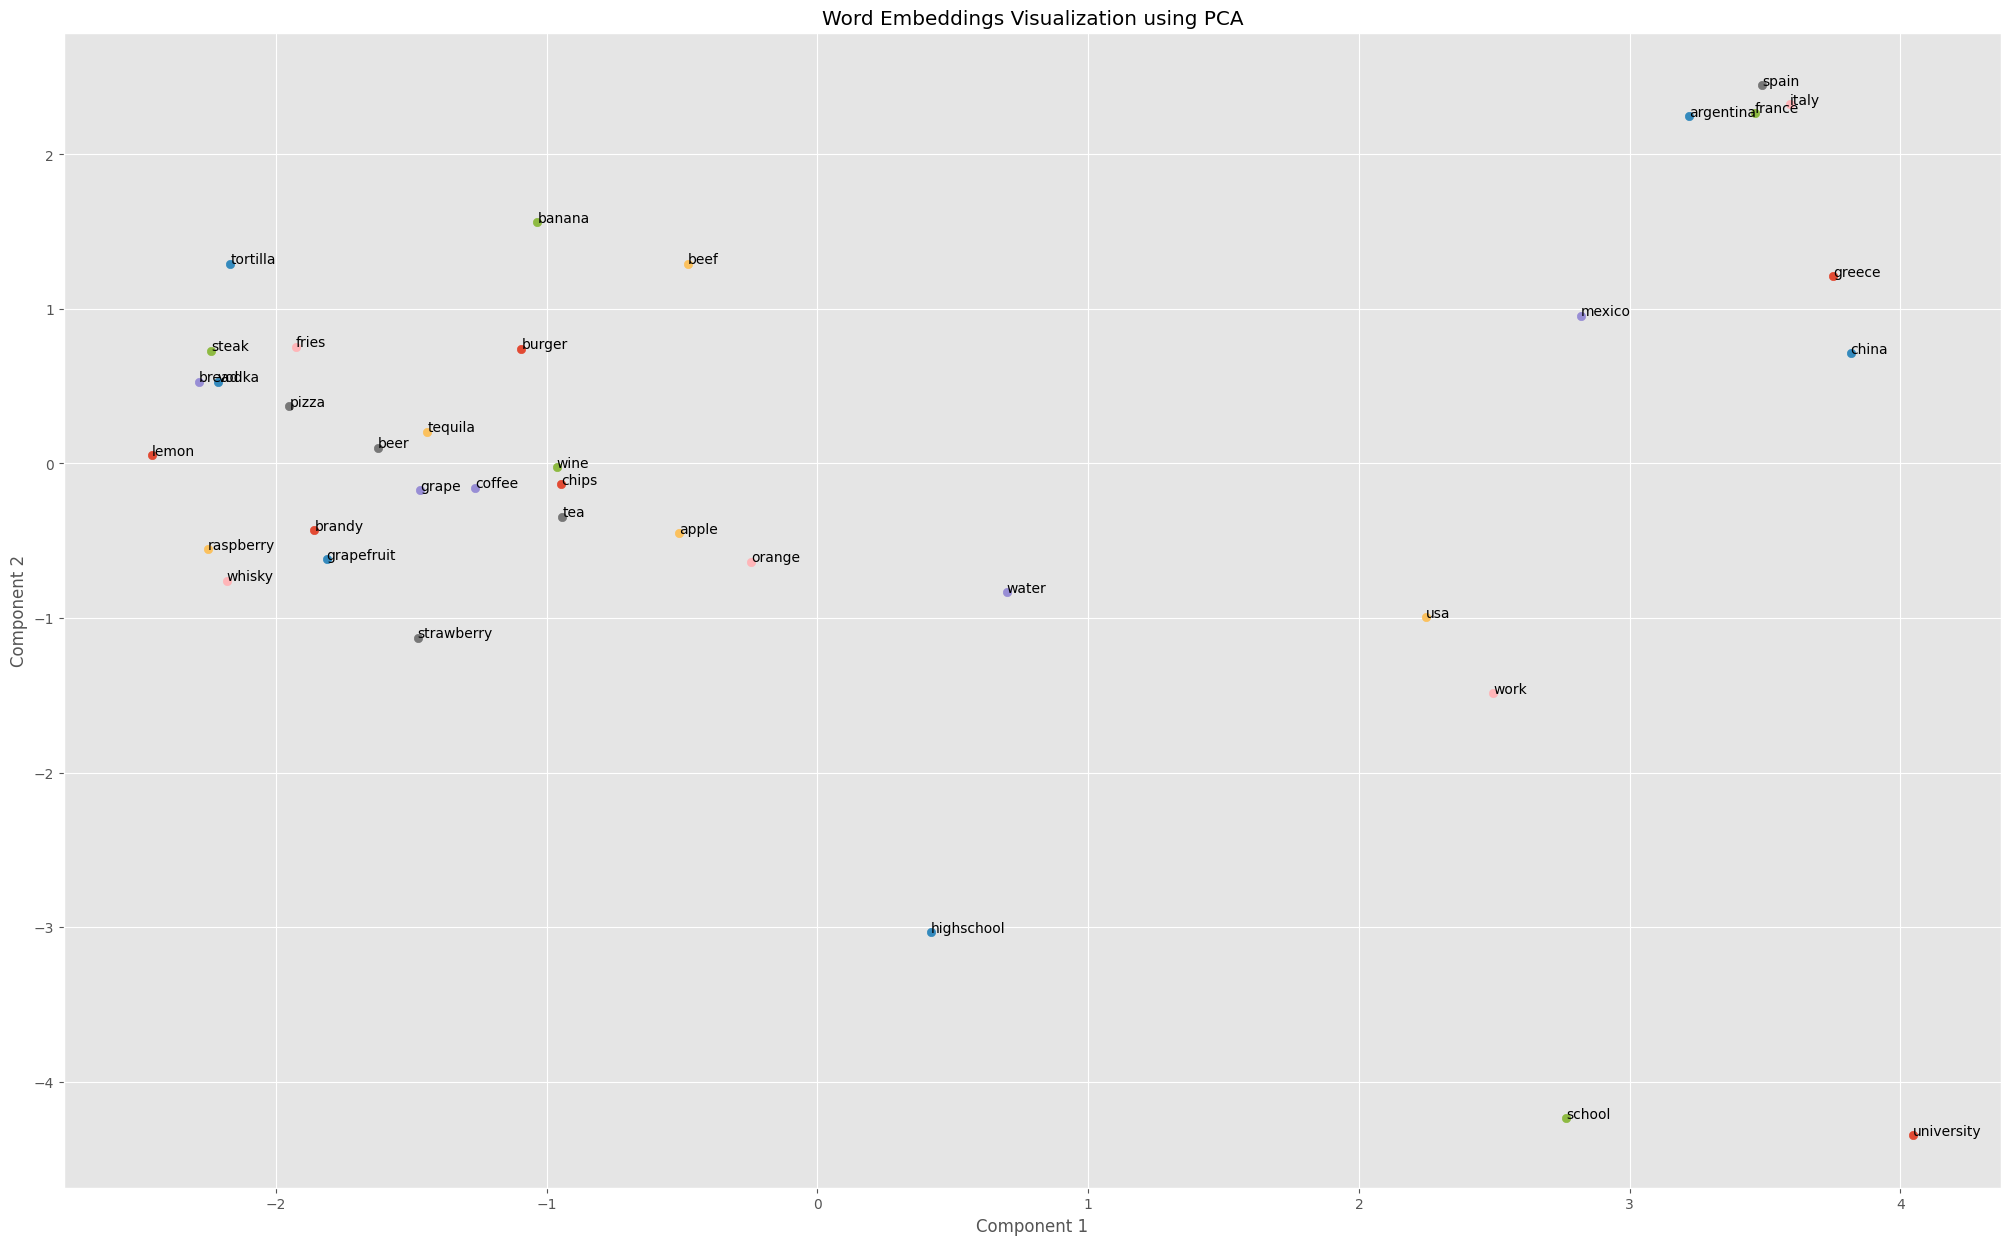

In [13]:
# Plot the results for 50d vector
plot_embeddings(PATH1, words, emb_dim1, embeddings_dict1, PCA)

# PCA Visualization of Word Embeddings Using GloVe 6B 50d

Using PCA as the first dimensionality reduction technique we can observe interesting patterns in the data.

We observe clear clusters that reflect semantic relationships between different words. For instance, food-related words like "burger," "tortilla," "bread," "pizza," and "fries" are located close to each other, indicating that these embeddings capture the shared context of fast food and similar concepts.

Similarly, countries such as "Argentina," "Mexico," "Spain," "France," "Italy," and "Greece" form a distinct cluster, which suggests a geographical or cultural similarity captured by the embeddings.

Additionally, words associated with drinks, like "beer," "tequila," "wine," "whisky," and "vodka," appear in a separate grouping, highlighting the semantic relationship between alcoholic beverages.

The educational terms "school," "highschool," "university," and "work" also form a unique cluster, reflecting their conceptual proximity in language.

This visualization illustrates how PCA can reveal underlying relationships in word embeddings, grouping words with similar contexts and meanings.

**NOTE: To visualize better the resulting image, you can download the file and open it in your local machine.**

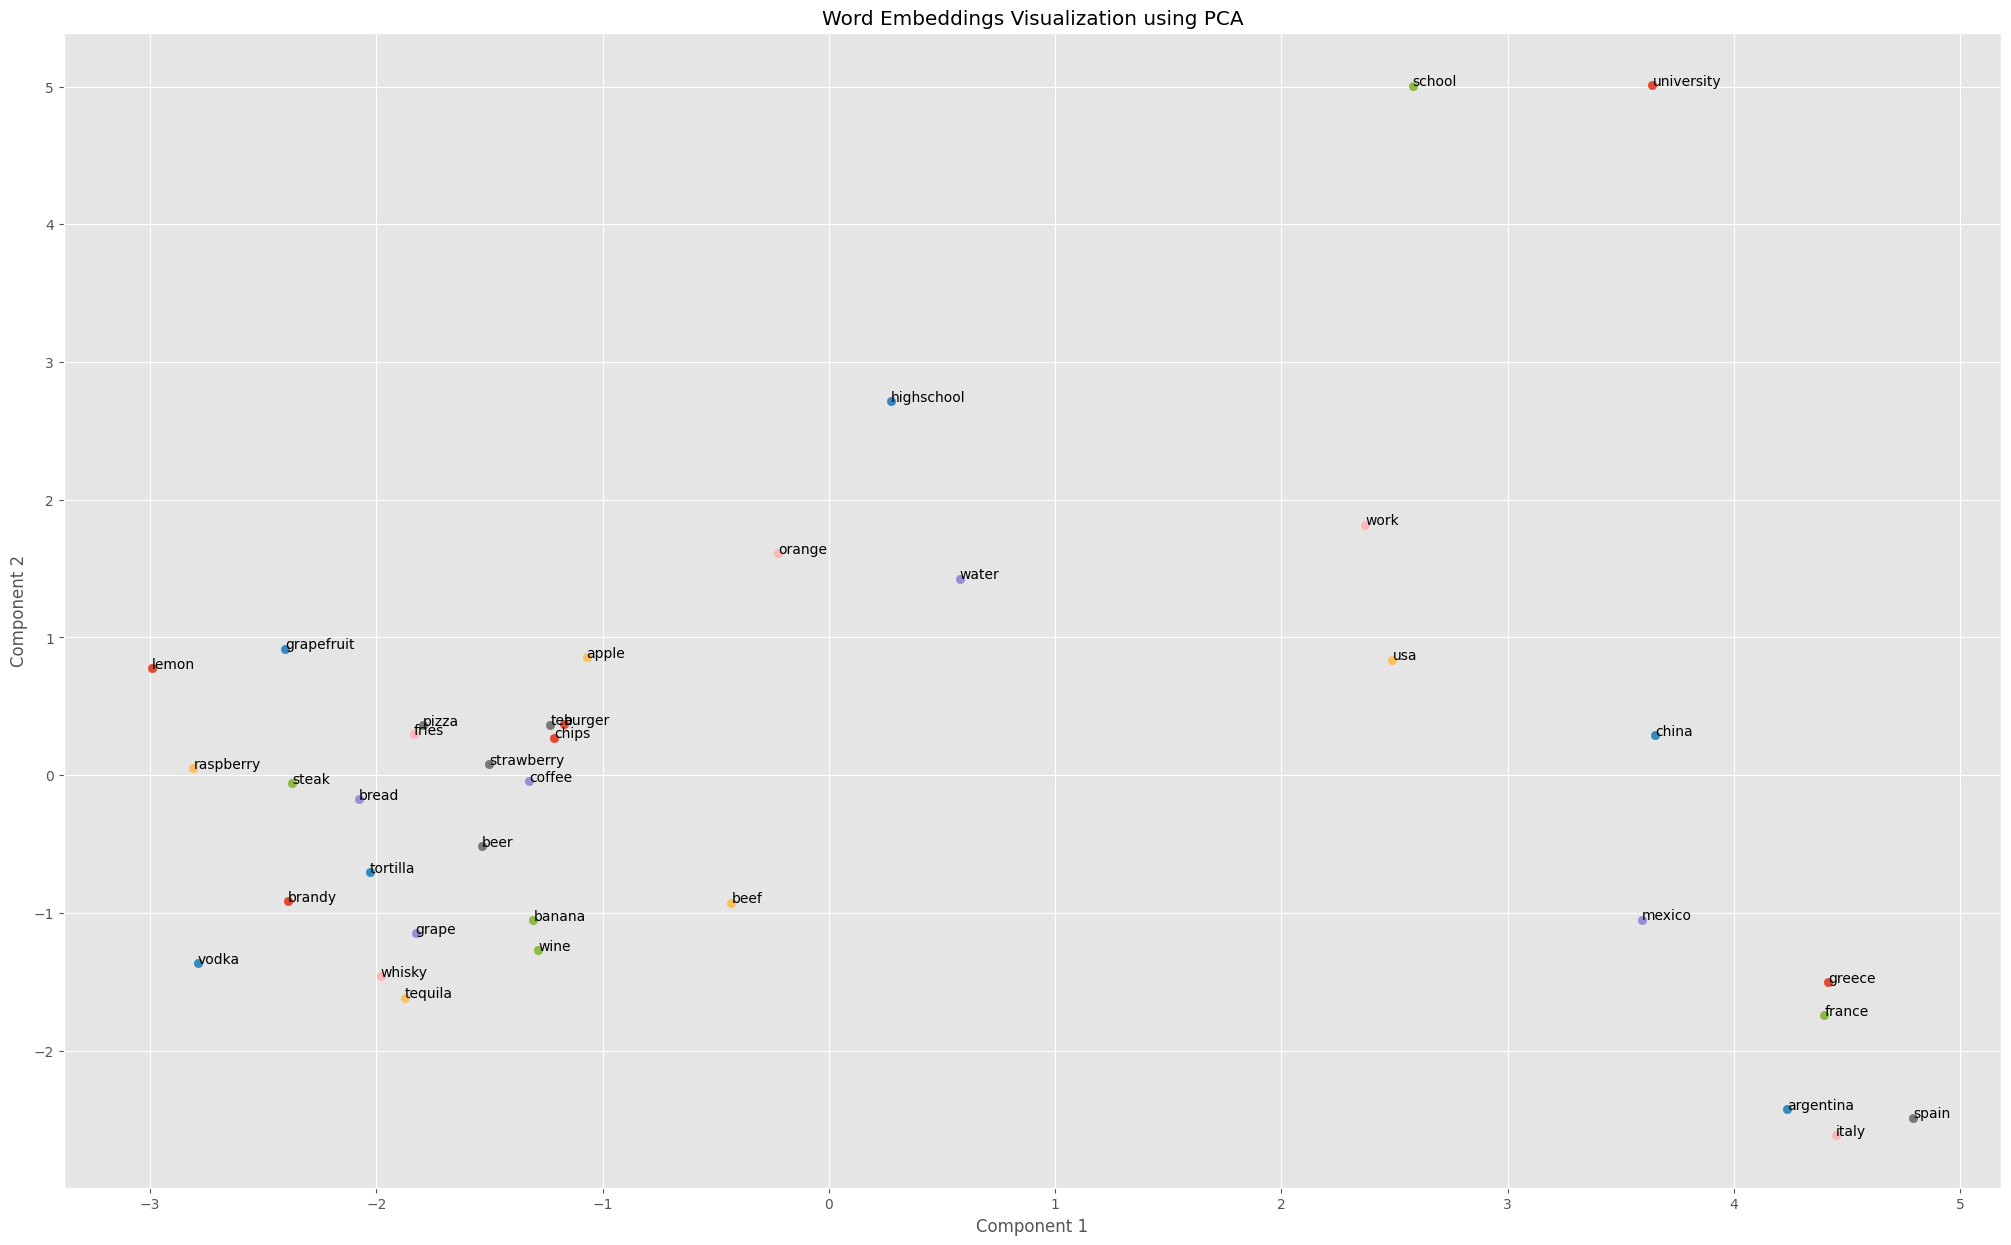

In [14]:
# Plot the results for 200d  vector
plot_embeddings(PATH2, words, emb_dim2, embeddings_dict2, PCA)

# PCA Visualization of Word Embeddings Using GloVe 6B 200d

Using PCA as the first dimensionality reduction technique, we observe interesting semantic patterns in this visualization, which is generated from the GloVe 6B 200-dimensional word embeddings. This differs from the previous visualization, which utilized the GloVe 6B 50-dimensional embeddings. The higher-dimensional embeddings here provide potentially richer and more nuanced clustering.

Food-related terms such as "pizza," "burger," "chips," "fries," and "coffee" cluster closely, capturing the shared semantic context of common foods and snacks. The increased dimensionality seems to preserve these associations with finer detail.

Similarly, country names, including "Argentina," "Italy," "Spain," "France," and "Greece," form a distinct cluster, indicating cultural or geographic proximity. The higher dimension likely aids in capturing subtler connections among these countries, which are preserved in the lower-dimensional PCA space.

In another group, we observe beverages like "vodka," "whisky," "tequila," and "wine" clustered together, reinforcing the semantic relationship among alcoholic drinks, a pattern preserved despite the increase in dimensional complexity.

Additionally, educational terms "school," "highschool," and "university" appear grouped, reflecting their conceptual similarity in academic and professional contexts.

This visualization highlights how using a higher-dimensional embedding model, such as GloVe 6B with 200 dimensions, can capture more intricate relationships between words, which are reflected in the PCA-reduced space. The richer embeddings reveal underlying semantic structures, grouping words with similar meanings and contexts in a way that’s consistent but potentially more detailed compared to the 50-dimensional embeddings.

**NOTE: To visualize better the resulting image, you can download the file and open it in your local machine.**

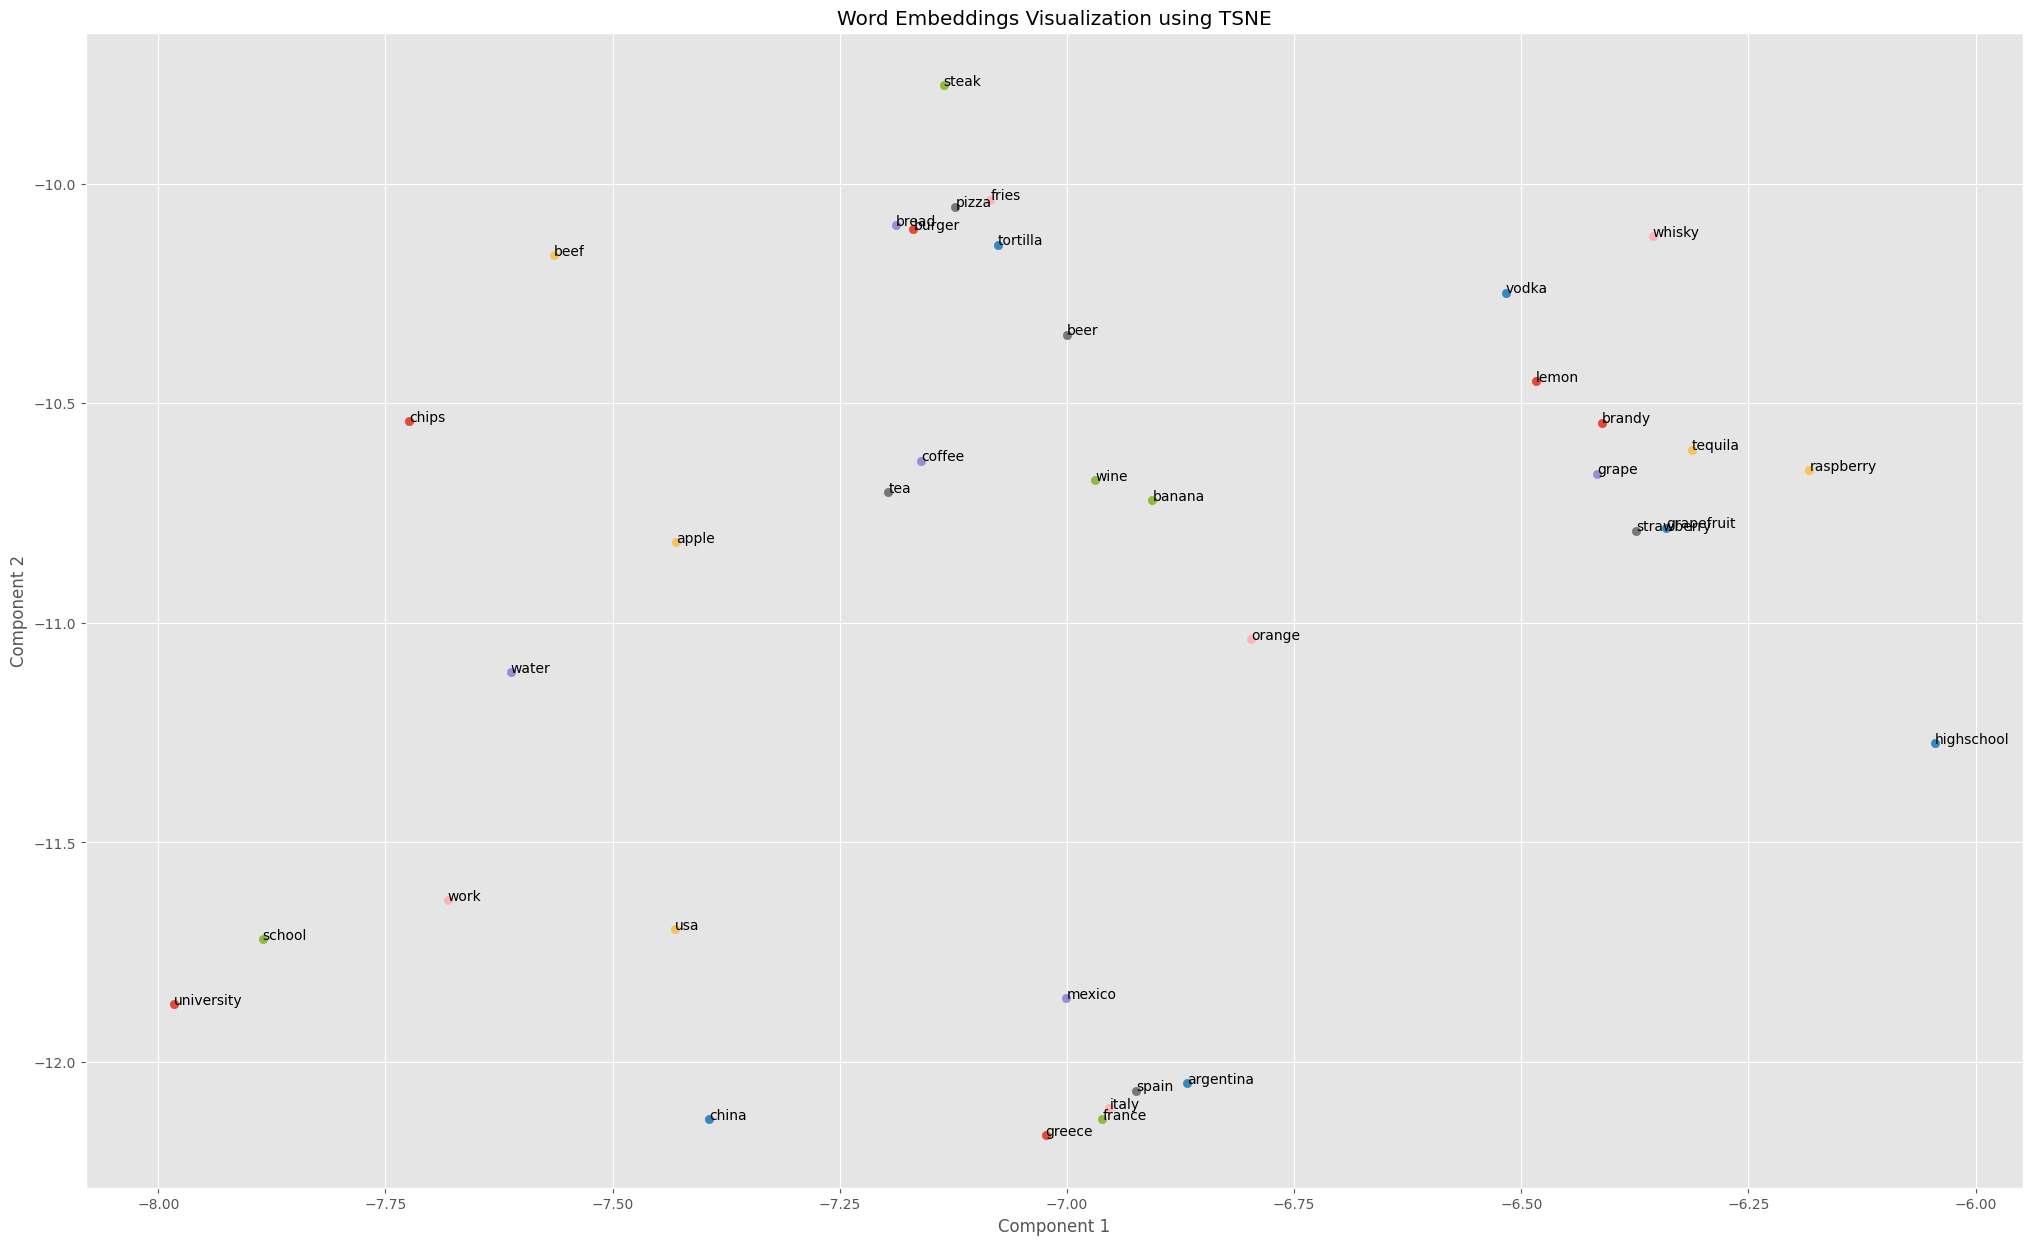

In [15]:
# t-SNE dimensionality reduction for visualization for 50d vector
embeddings = plot_embeddings(PATH1, words, emb_dim1, embeddings_dict1, TSNE)

# t-SNE Visualization of Word Embeddings Using GloVe 6B 50d

In the t-SNE visualization of word embeddings, we see well-defined clusters that reveal intricate relationships between words.

The countries "Argentina," "Mexico," "Spain," "France," "Italy," and "Greece" form a compact cluster, showing their cultural or geographical similarity.

Food items such as "burger," "pizza," "tortilla," "fries," "steak," and "bread" are grouped together, while beverages, including "coffee," "tea," "wine," and "water," form a distinct cluster. Within the beverage cluster, alcoholic drinks like "whisky," "brandy," "vodka," and "tequila" are closer to each other, with fruits like "apple," "banana," "grape," and "orange" forming their own subgroup nearby.

Compared with the previous results in PCA, t-SNE provides a clearer separation between categories, allowing us to see these relationships more distinctly. This suggests that t-SNE may capture the nuanced semantic differences in word embeddings more effectively than PCA, making it especially useful for exploring complex relationships in high-dimensional data.

**NOTE: To visualize better the resulting image, you can download the file and open it in your local machine.**

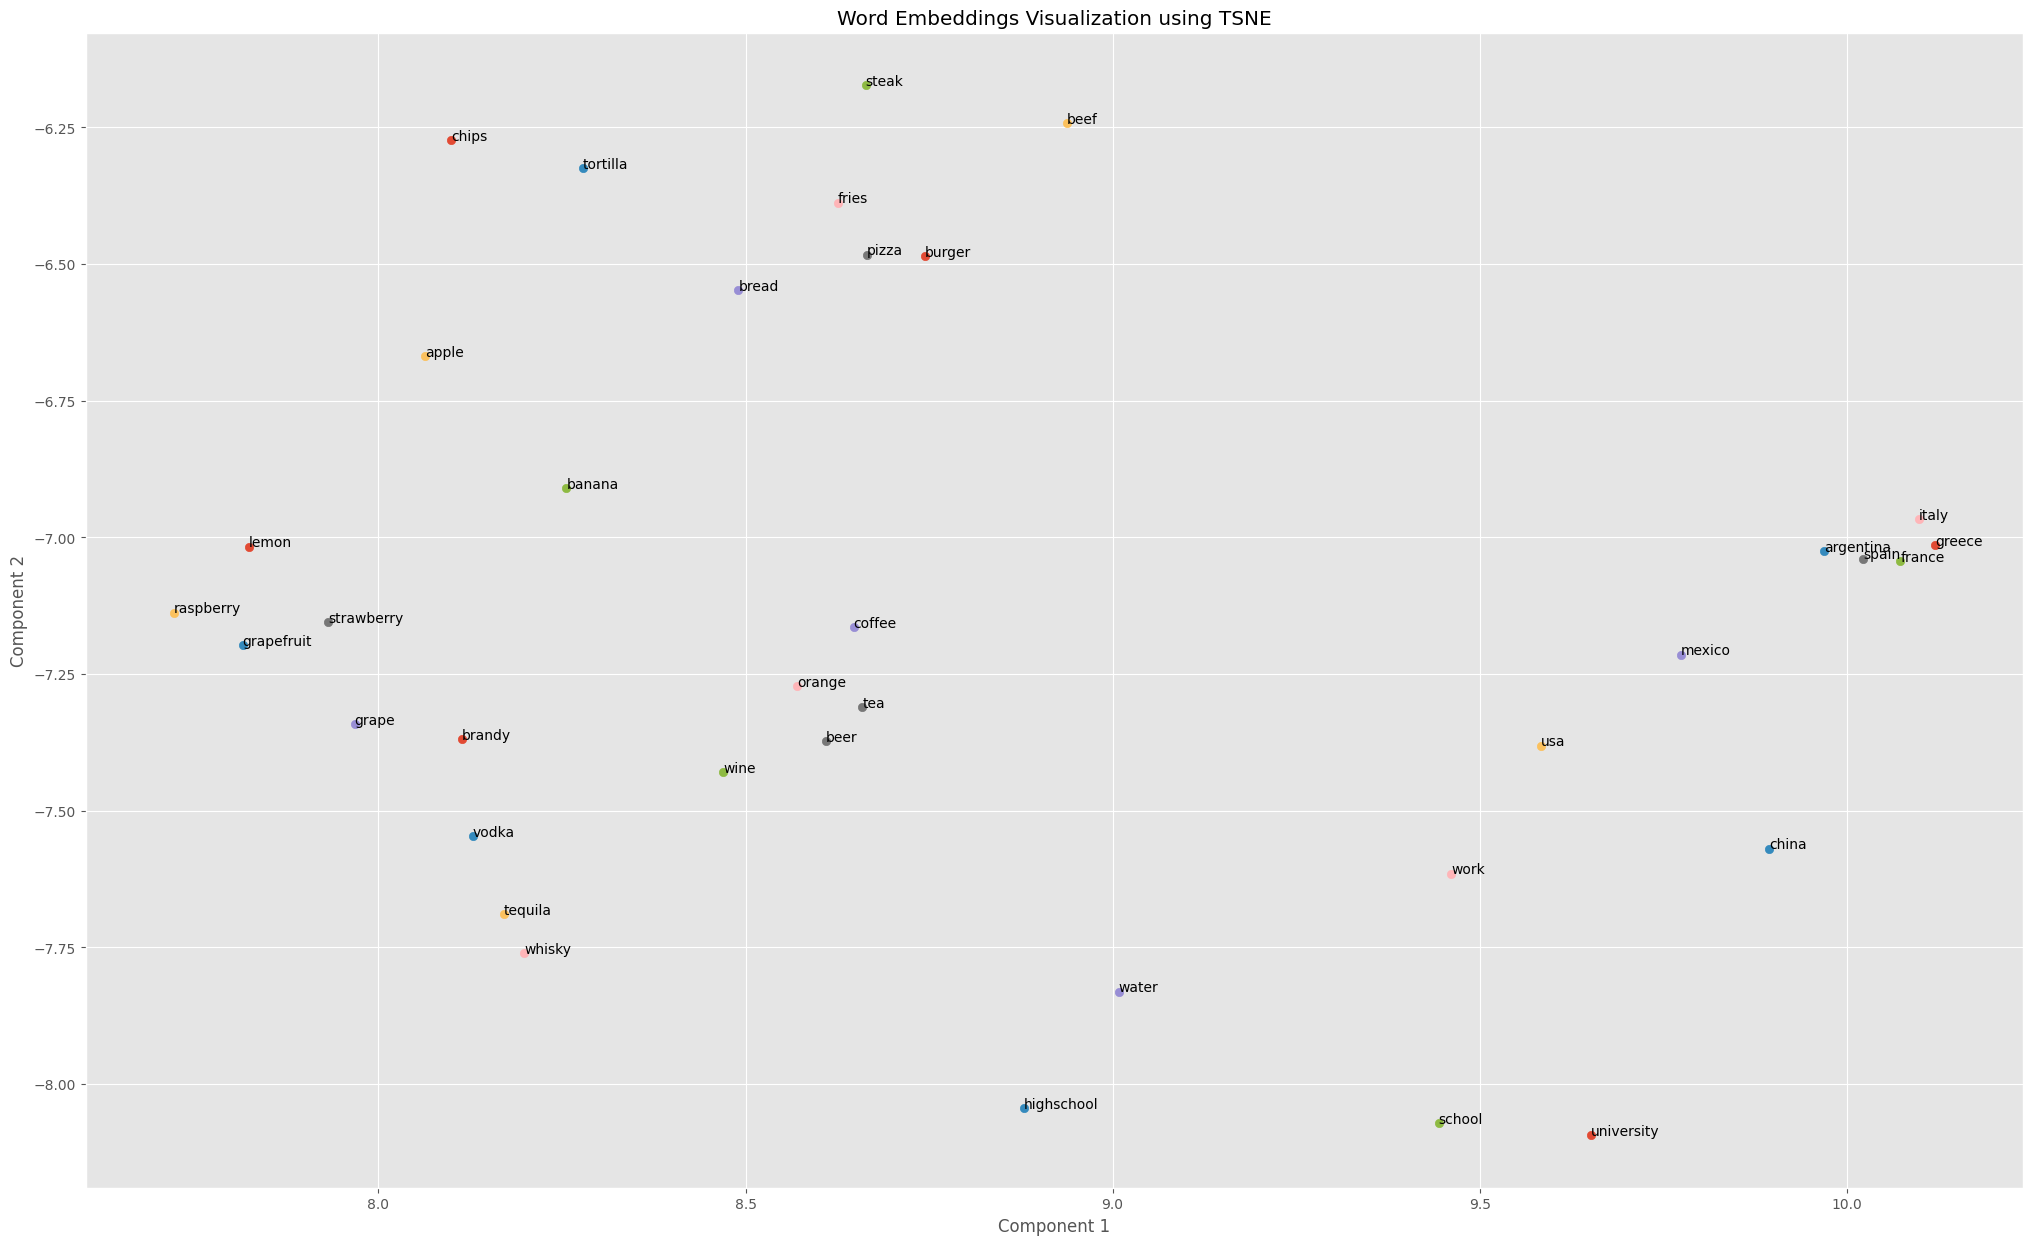

In [16]:
# t-SNE dimensionality reduction for visualization for 200d vector
embeddings = plot_embeddings(PATH2, words, emb_dim2, embeddings_dict2, TSNE)

# t-SNE Visualization of Word Embeddings Using GloVe 6B 200d

In this t-SNE visualization of word embeddings using GloVe 6B with 200 dimensions, we observe distinct clusters that highlight intricate relationships between words. The increased dimensionality compared to the 50-dimensional embeddings likely captures more subtle semantic nuances.

A cluster of countries—"Argentina," "Mexico," "Spain," "France," "Italy," and "Greece"—appears closely grouped, reflecting their cultural or geographical connections.

Food-related terms like "burger," "pizza," "tortilla," "fries," "steak," and "bread" are positioned together, emphasizing their shared context. Nearby, we see non-alcoholic beverages like "coffee," "tea," and "beer" grouped separately, while alcoholic drinks, including "whisky," "brandy," "vodka," and "tequila," form their own subgroup, highlighting their semantic connection.

A cluster of fruits—such as "apple," "banana," "grape," "orange," and "grapefruit"—also emerges, indicating their contextual similarity as types of produce.

In contrast to previous visualizations, the 200-dimensional t-SNE provides a refined view with clearer separations between categories, likely capturing deeper semantic relationships. This highlights how t-SNE, paired with higher-dimensional embeddings, effectively reveals complex structures within high-dimensional data.

**Note: For optimal visibility, consider downloading and viewing the image locally.**

### Let us compute analogies

To implement the method "analogy", we need to define a function that calculates the analogy between words.

The analogy is calculated as the difference between the vectors of the words in the following way:
    
$ analogy = vector(b) - vector(a) + vector(c) $
    
The word that is closest to the calculated analogy vector is considered the answer to the analogy.

The function below calculates the analogy between words using the embeddings dictionary.


In [17]:
# analogy
def analogy(word1, word2, word3, embeddings_dict):
    # Check if the words are in the dictionary
    if any(word not in embeddings_dict for word in [word1, word2, word3]):
        return 'One or more words are not in the dictionary'

    # Calculate the analogy using the formula: word2 - word1 + word3
    analogy = embeddings_dict[word2] - embeddings_dict[word1] + embeddings_dict[word3]

    # To find the closest word to the analogy, the algorithm uses the Euclidean distance
    # between the analogy and the embeddings of each word in the dictionary
    # then returns the word with the smallest distance.

    # Initialize the minimum distance to infinity because we want to find the smallest distance
    min_distance = float('inf')
    closest_word = ''

    for word in embeddings_dict:
        # Check if the word is not one of the input words
        if word in [word1, word2, word3]:
            continue

        # To calculate the euclidean distance we use the norm function from numpy
        distance = norm(analogy - embeddings_dict[word])

        # If the distance is smaller than the current minimum distance
        if distance < min_distance:
            min_distance = distance
            closest_word = word

    # Return the closest word to the analogy
    return closest_word


In [18]:
analogy('man', 'king', 'woman', embeddings_dict1)

'queen'

In [19]:
analogy('man', 'king', 'woman', embeddings_dict2)

'queen'

We will play with other examples to see how the function behaves. In this case, we will use the words 'country', 'capital', 'city' to calculate the analogy.

In [20]:
analogy('country', 'capital', 'city', embeddings_dict1)

'airport'

In [21]:
analogy('country', 'capital', 'city', embeddings_dict2)

'downtown'

In this analogy task, the input sequence "country" : "capital" :: "city" : ? suggests we are looking for a term that has a similar relationship to "city" as "capital" does to "country."

"Airport" (from the 50-dimensional embeddings): This response might reflect an association where cities often have airports. While it's not an exact analogy in the sense of hierarchical or administrative relationships, it may make sense in contexts where cities are frequently linked with airports in the embedding training data.

"Downtown" (from the 200-dimensional embeddings): This is arguably a better answer in terms of semantic hierarchy and geographical association, as "downtown" is often a central part of a city, just as a "capital" is a central part of a country.

Given that "downtown" more directly reflects a part of a city, similar to how a capital is a part of a country, it could be seen as the better answer from a purely semantic standpoint. However, neither answer is universally "correct" since embeddings capture patterns from their training data rather than following exact logic.

### Find the most similar words

To find the most similar words to a given word, we need to define a function that calculates the cosine similarity between the vector of the given word and the vectors of all other words.

The cosine similarity between two vectors $a$ and $b$ is calculated as follows:

$ similarity = \frac{a \cdot b}{||a|| \cdot ||b||} $

The following function calculates the cosine similarity between the vector of a given word and the vectors of all other words using the embeddings dictionary.



Reference:

TechClaw. (2021, April 8). Cosine similarity between two arrays for word embeddings. Medium. https://medium.com/@techclaw/cosine-similarity-between-two-arrays-for-word-embeddings-c8c1c98811b

In [22]:
# most similar
def find_most_similar(word, embeddings_dict, top_n=10):
    # Check if the word is in the dictionary
    if word not in embeddings_dict:
        return 'The word is not in the dictionary'

    # Calculate the similarity between the word and all the other words in the dictionary
    # The similarity is calculated using the cosine similarity.
    similarities = {}

    for w in embeddings_dict:
        # Check that the word is not the same as the input word
        if w == word:
            continue

        # Calculate cosine similarity using numpy and the given formula: A.B / (||A|| * ||B||)
        # First we calculate the dot product of the two vectors
        # Then we divide by the product of the norms of the two vectors
        similarity = np.dot(embeddings_dict[word], embeddings_dict[w]) / (norm(embeddings_dict[word]) * norm(embeddings_dict[w]))

        # Store the similarity in the dictionary, using the word as the key
        similarities[w] = similarity

    # Sort the words by similarity
    most_similar = sorted(similarities, key=similarities.get, reverse=True)

    # Return the top n most similar words
    return most_similar[:top_n]

In [23]:
most_similar_1a = find_most_similar('mexico', embeddings_dict1)

In [24]:
most_similar_1b = find_most_similar('mexico', embeddings_dict2)

In [25]:
for i, w in enumerate(most_similar_1a, 1):
    print(f'{i} ---> {w}')

1 ---> mexican
2 ---> venezuela
3 ---> colombia
4 ---> peru
5 ---> chile
6 ---> puerto
7 ---> rico
8 ---> cuba
9 ---> guatemala
10 ---> panama


In [26]:
for i, w in enumerate(most_similar_1b, 1):
    print(f'{i} ---> {w}')

1 ---> mexican
2 ---> venezuela
3 ---> colombia
4 ---> peru
5 ---> guatemala
6 ---> argentina
7 ---> brazil
8 ---> chile
9 ---> bolivia
10 ---> america


The 200-dimensional embeddings appear to capture a wider range of associations, including not just countries but also adjectives or broader terms like "America." This suggests that the higher-dimensional embeddings may capture finer semantic distinctions.

We tried with other examples using the method find_most_similar to see how the function behaves. In this case, we will use the word 'king' to find the most similar words.

In [27]:
most_similar_2a = find_most_similar('king', embeddings_dict1)

for i, w in enumerate(most_similar_2a, 1):
    print(f'{i} ---> {w}')

1 ---> prince
2 ---> queen
3 ---> ii
4 ---> emperor
5 ---> son
6 ---> uncle
7 ---> kingdom
8 ---> throne
9 ---> brother
10 ---> ruler


In [28]:
most_similar_2b = find_most_similar('king', embeddings_dict2)

for i, w in enumerate(most_similar_2b, 1):
    print(f'{i} ---> {w}')

1 ---> prince
2 ---> queen
3 ---> kingdom
4 ---> monarch
5 ---> ii
6 ---> throne
7 ---> reign
8 ---> iii
9 ---> crown
10 ---> emperor


The 200-dimensional embeddings capture a richer variety of terms directly related to the concept of a king, including symbols and formal terms associated with monarchy. In contrast, the 50-dimensional embeddings include some familial terms (e.g., "son," "uncle") and less direct associations, perhaps due to a limited capacity to differentiate nuances in relationships.

And as a third example, we will use the word 'apple' to find the most similar words.

In [29]:
most_similar_3a = find_most_similar('apple', embeddings_dict1)

for i, w in enumerate(most_similar_3a, 1):
    print(f'{i} ---> {w}')

1 ---> blackberry
2 ---> chips
3 ---> iphone
4 ---> microsoft
5 ---> ipad
6 ---> pc
7 ---> ipod
8 ---> intel
9 ---> ibm
10 ---> software


In [30]:
most_similar_3b = find_most_similar('apple', embeddings_dict2)

for i, w in enumerate(most_similar_3b, 1):
    print(f'{i} ---> {w}')

1 ---> iphone
2 ---> microsoft
3 ---> intel
4 ---> macintosh
5 ---> ipod
6 ---> ibm
7 ---> ipad
8 ---> software
9 ---> google
10 ---> itunes


The 200-dimensional embeddings capture a more specific set of terms that are closely related to Apple's ecosystem (e.g., "macintosh," "itunes," "mac"), as well as competitors and collaborators in the tech space (e.g., "microsoft," "google"). This suggests that the higher-dimensional embeddings are able to capture a more refined context around "apple."

In contrast, the 50-dimensional embeddings provide a broader range of tech-related terms without focusing as precisely on Apple-specific products or services. The presence of words like "blackberry" and "chips" reflects a general association with technology rather than Apple's direct ecosystem.

It's interesting to see the results of this experiments, becuase we can see in some cases unexpected results. This is in part because the embeddings are based on the context in which the words appear, and this data base has a limited number of words and contexts. So, the results are not perfect, but they are good enough to show the power of word embeddings.

### Conclusion

In this practice, we explored the concept of word embeddings and their applications in Natural Language Processing. By using pre-trained GloVe embeddings, we gained hands-on experience in manipulating high-dimensional data, performing dimensionality reduction with PCA and t-SNE, and visualizing word relationships in a lower-dimensional space.

Implementing the word similarity and analogy functions without relying on pre-built libraries provided us with a more profound understanding of cosine similarity and vector arithmetic in capturing semantic relationships between words. For example, we observed how words with similar meanings clustered together in reduced-dimensional space, and how analogy tasks could reveal inherent relationships like “king” to “queen” or “city” to “airport”

This exercise reinforced the value of word embeddings in NLP by showing us how these vector representations capture subtle, complex relationships in language. As a team, we learned the importance of data preprocessing, managing high-dimensional data, and using vector-based mathematics to uncover insights. This foundational knowledge will be valuable for future projects that involve embedding-based models or require understanding relationships within textual data.

Overall, this practice has equipped us with both theoretical and practical insights into embeddings, dimensionality reduction, and the power of vector operations in NLP tasks.



### Conclusion PROPOSAL

In this practice, we explored the concept of word embeddings and their applications in Natural Language Processing. By using pre-trained GloVe embeddings, we gained hands-on experience in manipulating high-dimensional data, performing dimensionality reduction with PCA and t-SNE, and visualizing word relationships in a lower-dimensional space.

Implementing the word similarity and analogy functions without relying on pre-built libraries provided us with a deeper understanding of cosine similarity and vector arithmetic in capturing semantic relationships between words. For example, we observed how words with similar meanings clustered together in reduced-dimensional space, and how analogy tasks could reveal inherent relationships, like “king” to “queen” or “city” to “airport” and “city” to “downtown,” depending on the embedding’s dimensionality. This difference highlighted how higher-dimensional embeddings (200d) may capture more nuanced associations, while lower-dimensional embeddings (50d) focus on broader relationships.

Through additional experiments with word similarity functions, we saw that "Mexico" in the 50d embeddings clustered closely with Latin American countries like "Venezuela," "Colombia," and "Chile," reflecting regional proximity. Meanwhile, the 200d embeddings also included culturally related terms like "Mexican" and "America," indicating a richer contextual association. Similarly, examining "king" revealed that 200d embeddings captured additional hierarchical concepts like "monarch," "reign," and "crown," while 50d embeddings included familial terms such as "son" and "brother," suggesting a more generalized context.

We also observed the differing representations of "apple" across embedding dimensions. The 50d embeddings linked "apple" with general tech terms and competitors like "Blackberry" and "Microsoft," whereas the 200d embeddings more accurately associated it with Apple-specific products such as "Macintosh," "iTunes," and "Mac," underscoring the capacity of higher dimensions to capture company-specific ecosystems.

This exercise reinforced the value of word embeddings in NLP by showing us how these vector representations capture subtle, complex relationships in language. As a team, we learned the importance of data preprocessing, managing high-dimensional data, and using vector-based mathematics to uncover insights. This foundational knowledge will be valuable for future projects that involve embedding-based models or require understanding relationships within textual data.

Overall, this practice has equipped us with both theoretical and practical insights into embeddings, dimensionality reduction, and the power of vector operations in NLP tasks. We have developed a stronger foundation in working with embeddings, enabling us to better analyze and interpret semantic relationships within text data in future NLP projects.